**IMPORTING NECESSARY LIBRARIES**

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DOWNLOADING DATASET**

In [114]:
!gdown 1wcm_Fd9j-Yarqhiwsfs016uNc0YUn2WG

Downloading...
From: https://drive.google.com/uc?id=1wcm_Fd9j-Yarqhiwsfs016uNc0YUn2WG
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 181MB/s]


**READING .CSV FILE**

In [115]:
netflix_data = pd.read_csv('netflix.csv')
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Exploring the Data**

In [116]:
#Get basic information about the DataFrame
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [117]:
#Finding out the DataFrame dimensionality
netflix_data.shape

(8807, 12)

### **Data Cleaning, Data Analysis & Visualization**


**Un-nesting the columns**

In [118]:
# Creating a function to un-nest a dataframe based on a specific column
def unnest_dataframe(df, column):
    return (df.drop(column, axis=1).join(df[column].str.split(',', expand=True).stack()
    .reset_index(level=1, drop=True).rename(column)))

# Un-nesting the 'cast' column
unnested_cast = unnest_dataframe(netflix_data, 'cast')

# Un-nesting the 'title' column
unnested_title = unnest_dataframe(netflix_data, 'title')

# Un-nesting the 'country' column
unnested_country = unnest_dataframe(netflix_data, 'country')

# Un-nesting the 'listed_in' (genre) column
unnested_listed_in = unnest_dataframe(netflix_data, 'listed_in')

# Un-nesting the 'director' column
unnested_director = unnest_dataframe(netflix_data, 'director')

**Handling null values**

In [119]:
# Check for missing values
netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [120]:
#For categorical variables with null values, update those rows as unknown_column_name.
categorical_columns = ['director', 'cast', 'country', 'listed_in', 'rating', 'date_added', 'release_year']
for i in categorical_columns:
  netflix_data[i].fillna(f'Unknown {i.capitalize()}', inplace=True)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [121]:
#Replace with 0 for continuous variables having null values.
continous_var_columns = [ 'duration' ]
for i in continous_var_columns:
  netflix_data[i].fillna(0, inplace = True)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [122]:
#Check for null values again to confirm the changes
netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [123]:
#Number of Unique Movies and TV Shows
unique_tv_shows = netflix_data.query('type == "TV Show"')['title'].nunique()
unique_movies = netflix_data.query('type == "Movie"')['title'].nunique()
unique_tv_shows, unique_movies

(2676, 6131)

In [124]:
# Counting the number of unique titles in each country using the unnested_country dataframe
unique_titles_per_country = unnested_country.groupby('country')['title'].nunique()

# Sorting the result in descending order
unique_titles_per_country_sorted = unique_titles_per_country.sort_values(ascending=False).head(10)

# Displaying the result
unique_titles_per_country_sorted

,title
country,
United States,3211
India,1008
United Kingdom,628
United States,479
Canada,271
Japan,259
France,212
South Korea,211
France,181


**Find the Total number Movies and TV shows?**

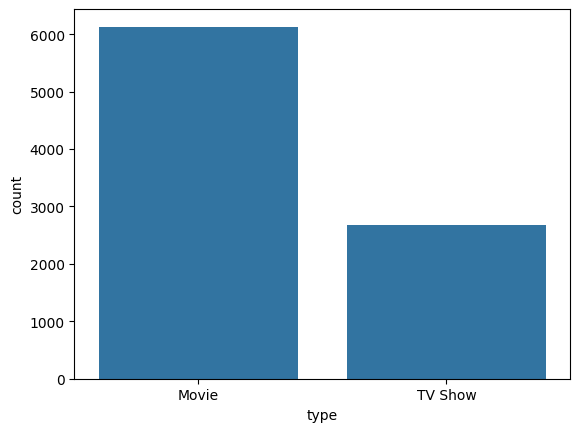

In [125]:
#Count of total movies and Tv shows
sns.countplot(data=netflix_data, x='type')
plt.show()

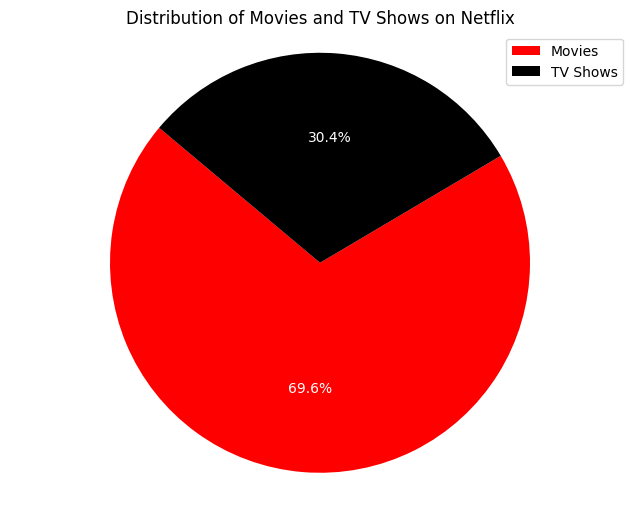

In [126]:
# Data for pie chart
labels = 'Movies', 'TV Shows'
sizes = [unique_movies, unique_tv_shows]
colors = ['red', 'black']

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color':"white"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding title and legend
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.legend()
# Show the pie chart
plt.show()

**Insights:**

*Unique TV Shows:*

The analysis reveals the number of unique TV shows available on Netflix.

*Unique Movies:*

The analysis also provides the count of unique movies available on Netflix.

**How has the number of movies released per year changed over the years?**

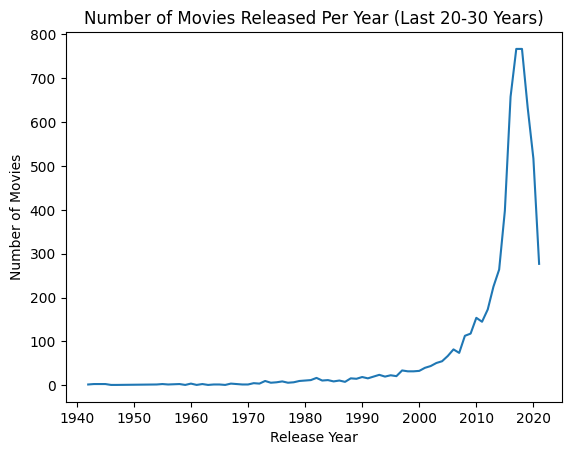

In [127]:
# Count of movies per year
movies_per_year = netflix_data[netflix_data['type'] == 'Movie'].groupby('release_year').size().reset_index(name='count')
sns.lineplot(data=movies_per_year, x='release_year', y='count')
plt.title('Number of Movies Released Per Year (Last 20-30 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

# **Comparison of TV shows vs. Movies**

**Change in movie releases over the years?**

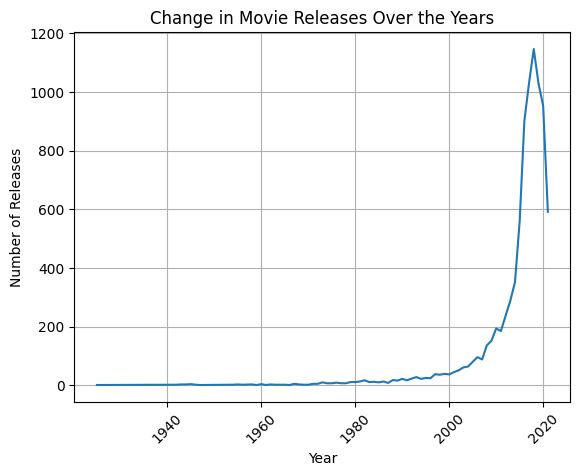

In [128]:
release_counts = netflix_data['release_year'].value_counts().sort_index()

sns.lineplot(x=release_counts.index, y=release_counts.values)
plt.title('Change in Movie Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Does Netflix have more focus on TV Shows than movies in recent years?**

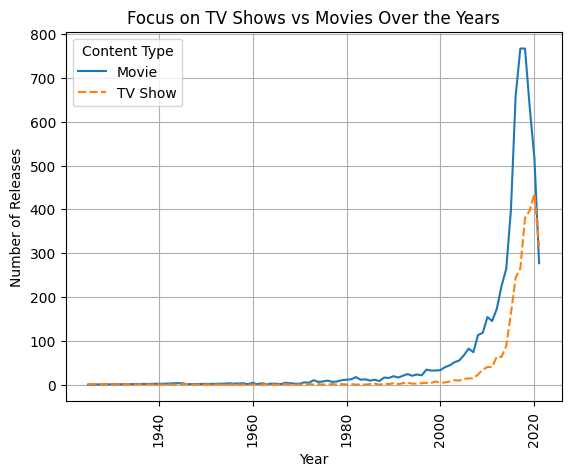

In [129]:
#content type in recent years
release_counts = netflix_data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
sns.lineplot(data=release_counts)
plt.title('Focus on TV Shows vs Movies Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=90)
plt.legend(title='Content Type')
plt.grid()
plt.show()

#Based on the observation Netflix have more focus on movies than TV Shows in recent years.

**Find the number of movies produced in each country and pick the top 10 countries?**

In [130]:
df_cleaned = netflix_data[netflix_data['country']!= 'Unknown Country']
# Filter the DataFrame to consider only movies
count_of_movies = df_cleaned.query('type == "Movie"')

# Group by country and count the number of unique movie titles
count_of_movies = count_of_movies.groupby('country')['title'].nunique()

# Take the top 10 countries with the highest movie counts
top_countries_movies = count_of_movies.sort_values(ascending=False).head(10)

top_countries_movies

,title
country,
United States,2058
India,893
United Kingdom,206
Canada,122
Spain,97
Egypt,92
Nigeria,86
Indonesia,77
Turkey,76


**Find the number of Tv-Shows produced in each country and pick the top 10 countries?**

In [131]:
df_cleaned = netflix_data[netflix_data['country']!= 'Unknown Country']

In [132]:
# Filter the DataFrame to consider only TV Shows
count_of_tvshows = df_cleaned.query('type == "TV Show"')

# Group by country and count the number of unique movie titles
tvshows_counts_by_country = count_of_tvshows.groupby('country')['title'].nunique()

# Take the top 10 countries with the highest tvshows counts
top_countries_tvshows = tvshows_counts_by_country.sort_values(ascending=False).head(10)

top_countries_tvshows

,title
country,
United States,760
United Kingdom,213
Japan,169
South Korea,158
India,79
Taiwan,68
Canada,59
France,49
Australia,48


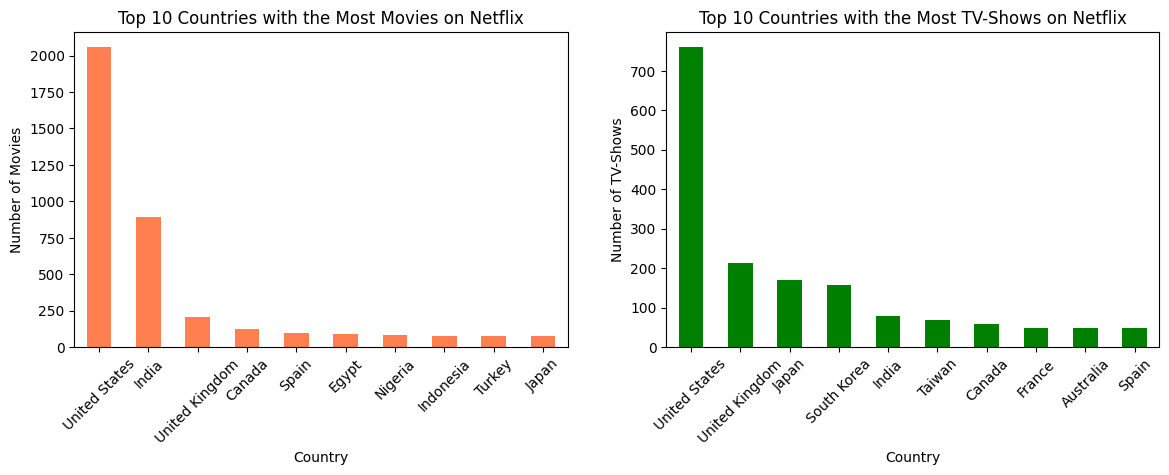

In [133]:
# Plotting the bar chart
plt.figure(figsize = (14,9))

plt.subplot(2,2,1)
top_countries_movies.plot(kind='bar', color='coral')
plt.title('Top 10 Countries with the Most Movies on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Adjust rotation for better readability

# Plotting the bar chart
plt.subplot(2,2,2)
top_countries_tvshows.plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Most TV-Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of TV-Shows')
plt.xticks(rotation=45)  # Adjust rotation for better readability
plt.show()

**Insights:**

*TV Show and Movies Distribution by Country:*

The analysis provides information on the distribution of TV shows across different countries.

*Top Countries with Highest TV Show and Movies Counts:*

*   The US, India and UK are the top 3 countries in Netflix movie production.
*   US, UK and Japan are the top 3 producers of TV shows on Netflix.
*   India produces relatively less no. of TV shows as compared to Movies.

The top countries with the highest number of TV shows and movies are identified based on the unique count of titles. These countries have a significant presence in contributing TV content to Netflix.

**Recommendations:**

*Content Localization:*

Given the high TV show and movies counts in certain countries, consider exploring opportunities for content localization. This could involve creating region-specific content or adapting existing shows to cater to the preferences of audiences in these top countries.

*Collaborations and Partnerships:*

Explore collaborations and partnerships with content creators, production houses, and talent from the top countries. This can strengthen relationships within the industry and potentially lead to the creation of more diverse and engaging TV shows and movies.

*Genre Preferences:*

Analyze the genre preferences of viewers in these top countries. Tailor content recommendations and new releases to align with the most popular genres in each region.

**What is the best time to launch a TV show?**

In [134]:
# Ensure you have a copy of the original DataFrame to avoid warnings
netflix_data = netflix_data[netflix_data['date_added'] != 'Unknown Date_added'].copy()

# Convert the 'Date' column to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='%B %d, %Y', errors='coerce')
# No need for the second conversion; this line is sufficient
# netflix_data['date_added'] = pd.to_datetime((netflix_data['date_added'])) # Remove this line

# Extract the month from the date
netflix_data['Month'] = netflix_data['date_added'].dt.month

# Filter for TV shows and movies
tv_shows = netflix_data.query('type == "TV Show"')
movies = netflix_data.query('type == "Movie"')

# Count titles per month
tv_shows_monthly = tv_shows.groupby('Month')['show_id'].count()
movies_monthly = movies.groupby('Month')['show_id'].count()

# Find the best month for releases
best_tv_shows_month = tv_shows_monthly.idxmax()
best_movies_month = movies_monthly.idxmax()

print('The best month to release the TV show:', best_tv_shows_month)
print('The best month to release the Movie:', best_movies_month)

The best month to release the TV show: 7.0
The best month to release the Movie: 7.0


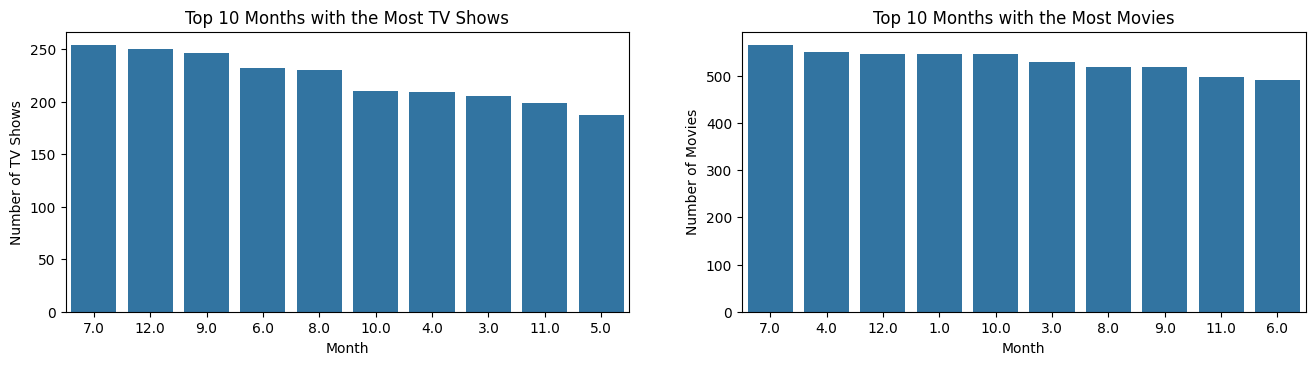

In [135]:
tv_shows_monthly = tv_shows_monthly.sort_values(ascending=False).iloc[:10]
movies_monthly = movies_monthly.sort_values(ascending=False).iloc[:10]

plt.figure(figsize = (16,8))
# Create a count plot directly from the DataFrame
plt.subplot(2,2,1)
sns.barplot(x=tv_shows_monthly.index,y=tv_shows_monthly.values,order=tv_shows_monthly.index)
plt.title('Top 10 Months with the Most TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')

# Create a count plot directly from the DataFrame
plt.subplot(2,2,2)
sns.barplot(x=movies_monthly.index,y=movies_monthly.values,order=movies_monthly.index)
plt.title('Top 10 Months with the Most Movies')
plt.xlabel('Month')
plt.ylabel('Number of Movies')

plt.show()

In [136]:
#Best Day to Release a TV Show
netflix_data['date_added'] = pd.to_datetime((netflix_data['date_added']))
netflix_data['Day'] = netflix_data['date_added'].dt.day_name()

# Assuming 'tv_shows' is your DataFrame
tv_shows = netflix_data.query('type == "TV Show"')
movies = netflix_data.query('type == "Movie"')

# Counting the number of titles per month and finding the month with the highest count
bestday_tv_shows = tv_shows.groupby('Day')['show_id'].nunique()
bestday_movies = movies.groupby('Day')['show_id'].nunique()

most_popular_tvshows_day = bestday_tv_shows.idxmax()
most_popular_movie_day = bestday_movies.idxmax()

print('The best day to release the TV show:', most_popular_tvshows_day)
print('The best day to release the Movie:',most_popular_movie_day)

The best day to release the TV show: Friday
The best day to release the Movie: Friday


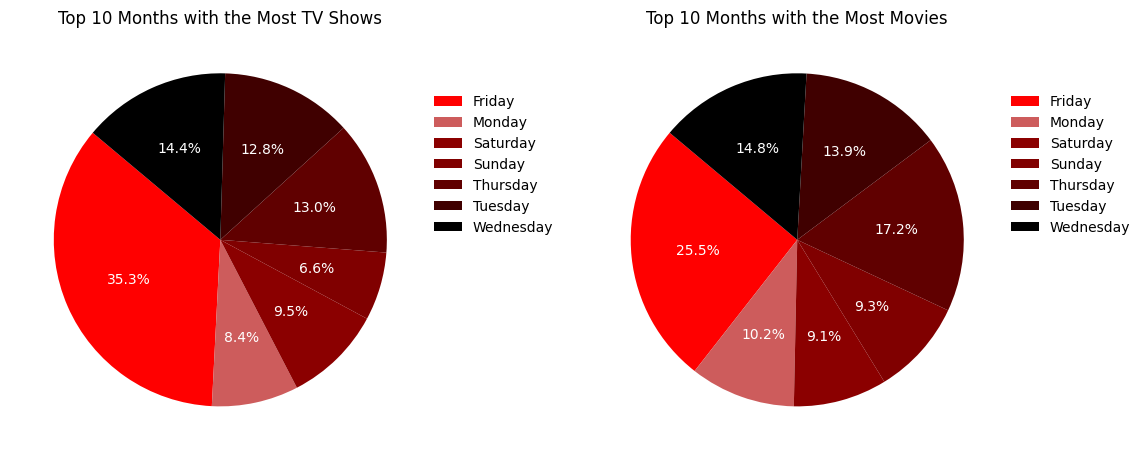

In [137]:
plt.figure(figsize = (12,9))
colors = ['#FF0000', '#CD5C5C', '#8B0000', '#800000', '#600000', '#400000', '#000000']

# Create a pie chart directly from the DataFrame
plt.subplot(2,2,1)
plt.pie(bestday_tv_shows.values, labels = bestday_tv_shows.index, autopct='%1.1f%%',
        colors = colors, startangle=140, textprops={'color':"white"}) # Create pie chart
plt.title('Top 10 Months with the Most TV Shows')
plt.legend(loc=(1, 0.5),frameon = False )


# Create a count plot directly from the DataFrame
plt.subplot(2,2,2)
plt.pie(bestday_movies.values, labels=bestday_movies.index, autopct='%1.1f%%',
        colors = colors, startangle=140, textprops={'color':"white"}) # Create pie chart
plt.title('Top 10 Months with the Most Movies')
plt.legend(loc=(1, 0.5),frameon = False )
plt.tight_layout()
plt.show()

**Insights**

*Seasonal Distribution of Releases:*

The graphs visually represent the distribution of releases throughout the year. Clear peaks indicate the most popular times for launching new content.

*Optimal Timing for TV Shows:*

The analysis suggests that the best time to launch a TV show on Netflix is during the 27th week of the year. Additionally, the month of December stands out as a favorable period for TV show releases.

*Optimal Timing for Movies:*

For movies, the best week to launch is the 1st week of the year, and the best month is July. These specific weeks and months are identified as peak times for movie releases.

Movies are prominently released in weeks falling in July, early October, late February to early March, late June to early July, and late August to early September.

This pattern suggests that movie production peaks around the beginning of summer, early fall, and late winter/early spring periods.

**Recommendations:**

*Strategic Content Release:*

Plan content releases strategically based on insights about the best months for TV shows and movies. Aligning releases with peak months can maximize viewership and engagement.

*Promotions and Marketing:*

Implement marketing and promotional activities during the identified peak months to enhance visibility and attract a larger audience. Consider special campaigns or collaborations to boost content awareness.

*Diversify Content Types:*

Analyze whether certain genres or types of content perform better in specific months. Diversify content offerings to cater to varied audience preferences throughout the year. Optimal Release Day:

Utilize insights about the best day to release TV shows and movies to optimize release schedules. This information can be crucial for creating impact and maximizing viewership on the most popular days.

*Viewer Engagement Strategies:*

Implement engagement strategies, such as interactive features, social media campaigns, or live events, during the identified best months and days. This can enhance the overall viewer experience.

*Continuous Monitoring:*

Regularly monitor viewership trends and update release strategies based on evolving audience preferences. Keep track of changing patterns to stay adaptable and responsive.

*Collaboration Opportunities:*

Explore collaboration opportunities with influencers, other content creators, or events during the best months. Collaborative efforts can amplify the reach and impact of content releases. By incorporating these recommendations, Netflix can optimize its content release strategy, improve audience engagement, and maintain a dynamic and successful platform throughout the year.

# **Analysis of actors/directors of different types of shows/movies**

**Identify the top 10 actors who have appeared in most movies or TV shows?**

In [138]:
# Stripping any leading/trailing whitespace from the cast names
unnested_cast['cast'] = unnested_cast['cast'].str.strip()

In [139]:
# Grouping by 'cast' and counting unique 'show_id' (titles)
unique_cast_titles_count = unnested_cast.groupby('cast')['show_id'].nunique().sort_values(ascending=False).head(10)
unique_cast_titles_count

,show_id
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


<ipython-input-140-f0d667c4206e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=unique_cast_titles_count.index,x=unique_cast_titles_count.values,palette='viridis')


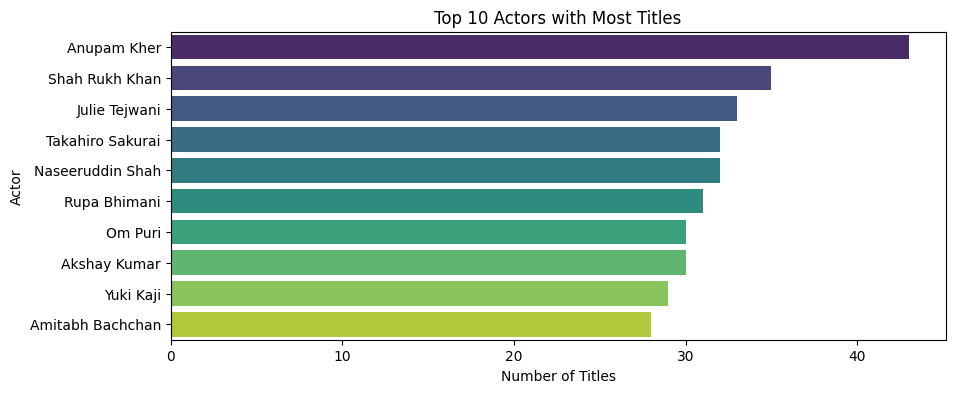

In [140]:
#Plotting the top 10 actors
plt.figure(figsize=(10, 4))
sns.barplot(y=unique_cast_titles_count.index,x=unique_cast_titles_count.values,palette='viridis')
plt.title('Top 10 Actors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

**Insights:**

*Prolific Presence of Anupam Kher:*

Anupam Kher leads the cast with 43 appearances, indicating a prolific and enduring presence in the entertainment industry. This suggests a consistent and valued contribution to various projects.

*Widespread Popularity of Shah Rukh Khan:*

Shah Rukh Khan closely follows with 35 appearances, reflecting widespread popularity and an extensive body of work. His presence suggests a strong appeal to a broad audience.

*Global Diversity in Cast:*

The list includes actors from different regions, showcasing a broad global appeal. For instance, renowned Japanese voice actors Takahiro Sakurai and Yuki Kaji bring diversity to the cast.

*Balanced Mix of Veteran and Newer Talents:*

The presence of actors such as Naseeruddin Shah and Amitabh Bachchan indicates a balance between veteran actors and newer talents. This blend can offer a diverse and dynamic range of performances.

**Recommendations:**

*Collaboration with Influential Actors:*

Given the prolific presence of Anupam Kher and the widespread popularity of Shah Rukh Khan, Netflix could consider collaborating with these influential actors. Such collaborations can attract their established fanbases, contributing to the success of Netflix projects.

*Exploration of Global Content:*

The inclusion of international talents like Takahiro Sakurai and Yuki Kaji suggests an opportunity for Netflix to explore and create diverse content for global audiences. This can enhance the platform's international appeal and reach.

*Leverage Veteran Talent for Quality Content:*

Leveraging the experience and gravitas of veteran actors like Naseeruddin Shah and Amitabh Bachchan can help Netflix in producing high-quality, critically acclaimed content. Their involvement can add depth and credibility to the platform's content offerings.

**Conclusion:**

By considering these insights and recommendations, Netflix can make informed decisions about casting choices, content creation, and audience engagement. The combination of established and diverse talents can contribute to the platform's success in attracting a broad and engaged viewer base.

**Identify the top 10 directors who have appeared in most movies or TV shows?**

In [141]:
# Group by 'director' and count unique occurrences, then sort in descending order
director_unique = unnested_director.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)

director_unique

,title
director,
Rajiv Chilaka,22
Raúl Campos,18
Jan Suter,18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12


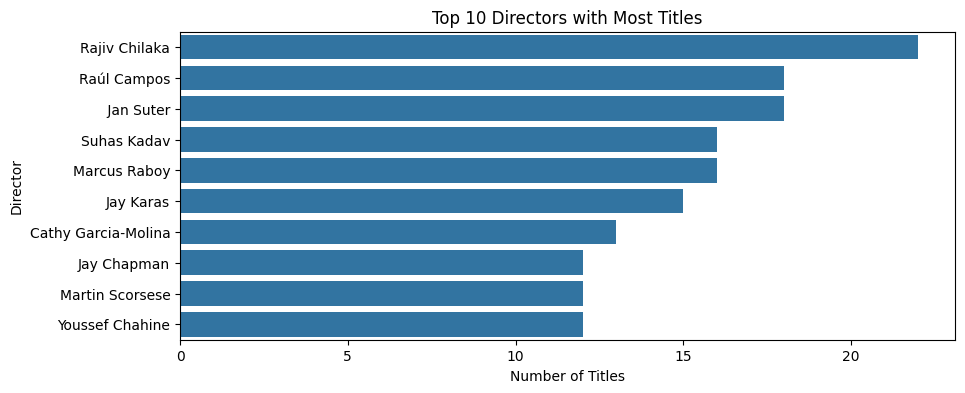

In [142]:
#Creating a barplot for the top 10 directors
plt.figure(figsize=(10, 4))
sns.barplot(y=director_unique.index,x=director_unique.values)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

**Insights:**

*Top Three Directors:*

Rajiv Chilaka, Raúl Campos, and Jan Suter are the top three directors with 22, 18, and 18 productions, respectively, showcasing their prolific contribution to Netflix's content library.

*Diversity in Content Creation:*

The list includes directors from different backgrounds and regions, highlighting Netflix's commitment to diversity in content creation.

*Martin Scorsese's Presence:*

Acclaimed filmmaker Martin Scorsese is among the top 10 directors, emphasizing Netflix's focus on collaborating with established industry talent. Recommendations:

*Collaboration and Expansion:*

Netflix could continue to collaborate with prolific directors like Rajiv Chilaka, Jan Suter, and Raúl Campos to maintain a diverse and extensive content library.

*Emerging Talent:*

The presence of directors like Suhas Kadav and Marcus Raboy implies an openness to working with emerging talent. This suggests the importance of supporting and nurturing new voices in the industry.

*Quality Content:*

Utilize the experience and expertise of directors like Martin Scorsese to create high-quality, acclaimed content that attracts a wide audience.

*Regional Content:*

Directors such as Cathy Garcia-Molina and Youssef Chahine could be leveraged to explore and produce regional content, catering to diverse audiences around the world. These recommendations emphasize collaboration, support for emerging talent, focus on quality, and exploration of regional content to enhance Netflix's content offerings.

**What is average Duration of Movies across Different Genres?**

In [143]:
# Step 1: Filter Movie Data
movies_data = netflix_data[netflix_data['type'] == 'Movie'].copy()

# Step 2: Convert Duration to Numeric
movies_data.loc[:, 'duration_numeric'] = movies_data['duration'].str.extract('(\d+)').astype(float)

# Step 3: Handle Missing Values in Duration
mean_duration = movies_data['duration'].str.replace(' min', '').astype(float).mean()
movies_data.loc[:, 'duration'] = movies_data['duration'].str.replace(' min', '').fillna(mean_duration).astype(int)

# Step 4: Unnest Genre Data
unnested_genre = unnest_dataframe(movies_data, 'listed_in')

# Step 5: Calculate Average Duration per Genre
average_duration_per_genre = unnested_genre.groupby('listed_in')['duration'].mean().reset_index()
average_duration_per_genre.sort_values(by='duration', ascending=False)

,listed_in,duration
2,Classic Movies,127.138889
6,Dramas,116.288996
21,Classic Movies,114.825
18,Action & Adventure,113.515716
25,Dramas,111.3775
13,Romantic Movies,110.706362
10,International Movies,110.461509
17,Thrillers,108.082031
28,International Movies,108.0625
12,Music & Musicals,106.960784


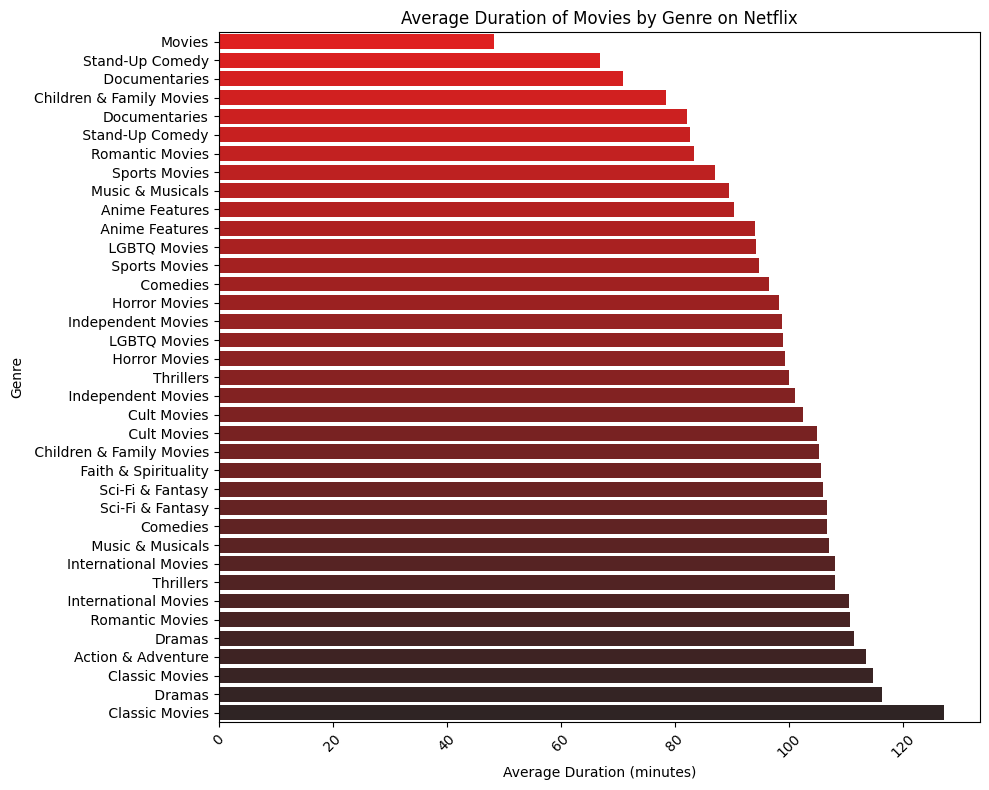

In [144]:
# Sorting the data for a better plot
sorted_data = average_duration_per_genre.sort_values(by='duration', ascending=True)

# Setting the color palette to shades of red and black
palette = sns.color_palette("dark:red_r", len(sorted_data))

# Creating the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="duration", y="listed_in", data=sorted_data, palette=palette, hue="listed_in")
plt.title('Average Duration of Movies by Genre on Netflix')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

**Insights:**

*Genre-Specific Duration Trends:*

Classic Movies and Dramas tend to have longer durations. This could be attributed to the narrative depth and character development often required in these genres.

Documentaries and Stand-Up Comedy typically have shorter durations. Documentaries may aim for conciseness to effectively deliver factual content, while stand-up comedy specials are generally shorter to maintain audience engagement.

*Viewer Preferences and Consumption Patterns:*

Shorter durations in genres like documentaries might align with viewers' preferences for concise, informative content that can be consumed in a single sitting.

Longer films in genres like dramas and classic movies might be more appealing to viewers who prefer in-depth storytelling and are willing to commit more time to a single movie.

**Recommendations:**

*Strategic Release Timing:*

The time series analysis of content added could guide Netflix in optimizing the timing of new releases. Understanding seasonal patterns or specific times when subscribers are more likely to watch new content can help in planning release schedules. According to my Analysis, Fridays are the most popular day for releases; week 1 is the most popular for Movies and week 27 is the most popular for TV Shows. July is the best month to release a Movie and December is the best month to release a TV Show.

*Expand Popular Genres in Key Ratings:*

If certain genres are performing well in specific rating categories, consider increasing the production or acquisition of similar content to cater to the established audience. For instance, TV-MA & TV-14 in International Movies and TV-MA in Dramas is a very popular rating-genre pair.